In [142]:
import pandas as pd
import glob
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [92]:
path_a01 = r'results/request_scratch/learning_rates/a0.01'

In [149]:
def read_csv(path):
    csv_files = glob.glob(path + "/*.csv")
    df_list = (pd.read_csv(file) for file in csv_files)
    full_df = pd.concat(df_list, ignore_index=True)
    full_df.columns = [c.replace(' ', '_') for c in full_df.columns]
    return full_df

In [150]:
a01 = read_csv(path_a01)

In [177]:
r_nex = -60
def plot_reward(df):
    reward_nex = r_nex * df['issued_but_nonexistent']
    reward_rem = df['reward'] - reward_nex

    plt.plot(savgol_filter(reward_rem, window_length=200, polyorder=2), label='reward_rem')
    plt.plot(savgol_filter(reward_nex, window_length=200, polyorder=2), label='reward_nex')

    plt.legend(loc="lower right")

    plt.xlabel('Timesteps')
    plt.ylabel('Reward')
    plt.title('Alpha = 0.01')

    plt.show()

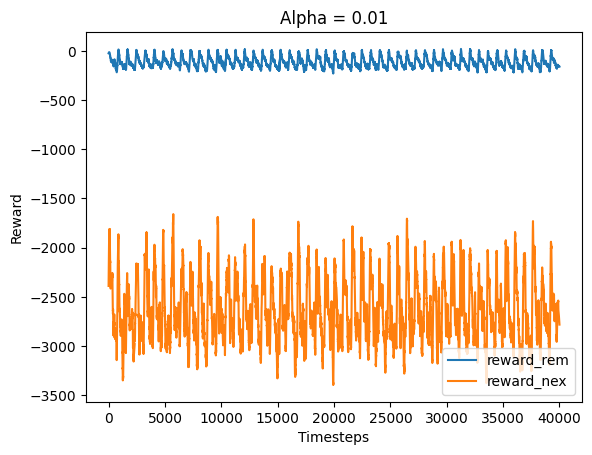

In [178]:
plot_reward(a01)